# KNN no `chb17_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb17_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.781609,0.873563,0.839080,0.816092,0.758621,0.873563,0.885057,0.804598,0.678161,0.896552,0.885057,0.896552,0.689655,0.839080,0.816092,0.885057,0.862069,0.678161
1,0.839080,0.816092,0.862069,0.862069,0.758621,0.908046,0.919540,0.793103,0.689655,0.839080,0.896552,0.931034,0.712644,0.850575,0.793103,0.896552,0.896552,0.781609
2,0.655172,0.873563,0.908046,0.862069,0.770115,0.919540,0.919540,0.804598,0.689655,0.885057,0.873563,0.919540,0.827586,0.816092,0.873563,0.919540,0.885057,0.839080
3,0.735632,0.827586,0.896552,0.885057,0.724138,0.931034,0.873563,0.793103,0.689655,0.896552,0.954023,0.977011,0.689655,0.793103,0.804598,0.931034,0.827586,0.827586
4,0.747126,0.885057,0.873563,0.885057,0.804598,0.965517,0.919540,0.839080,0.643678,0.954023,0.896552,0.908046,0.804598,0.816092,0.793103,0.919540,0.850575,0.804598
5,0.712644,0.908046,0.873563,0.885057,0.781609,0.839080,0.873563,0.758621,0.597701,0.862069,0.908046,0.908046,0.804598,0.747126,0.839080,0.908046,0.862069,0.793103
6,0.712644,0.873563,0.804598,0.885057,0.747126,0.931034,0.873563,0.804598,0.781609,0.885057,0.908046,0.896552,0.770115,0.908046,0.804598,0.919540,0.908046,0.781609
7,0.724138,0.885057,0.919540,0.827586,0.793103,0.908046,0.873563,0.827586,0.735632,0.885057,0.850575,0.896552,0.747126,0.839080,0.850575,0.896552,0.885057,0.827586
8,0.816092,0.862069,0.896552,0.873563,0.781609,0.931034,0.885057,0.781609,0.666667,0.919540,0.919540,0.896552,0.758621,0.827586,0.850575,0.885057,0.850575,0.816092
9,0.758621,0.839080,0.850575,0.885057,0.781609,0.931034,0.873563,0.850575,0.678161,0.896552,0.919540,0.908046,0.735632,0.724138,0.816092,0.862069,0.862069,0.793103


,count,mean,std,min,25%,50%,75%,max
11,20.0,0.915517,0.024814,0.885057,0.896552,0.908046,0.931034,0.977011
5,20.0,0.910345,0.031112,0.839080,0.893678,0.919540,0.931034,0.965517
10,20.0,0.901149,0.033230,0.816092,0.882184,0.908046,0.919540,0.954023
15,20.0,0.898851,0.029269,0.839080,0.882184,0.902299,0.919540,0.942529
9,20.0,0.887356,0.033893,0.827586,0.870690,0.890805,0.899425,0.954023
6,20.0,0.887356,0.018869,0.862069,0.873563,0.885057,0.899425,0.919540
2,20.0,0.878736,0.028025,0.804598,0.862069,0.885057,0.896552,0.919540
16,20.0,0.864943,0.022646,0.827586,0.850575,0.862069,0.885057,0.908046
3,20.0,0.859770,0.024624,0.816092,0.836207,0.867816,0.885057,0.885057
1,20.0,0.849425,0.030729,0.793103,0.824713,0.856322,0.873563,0.908046


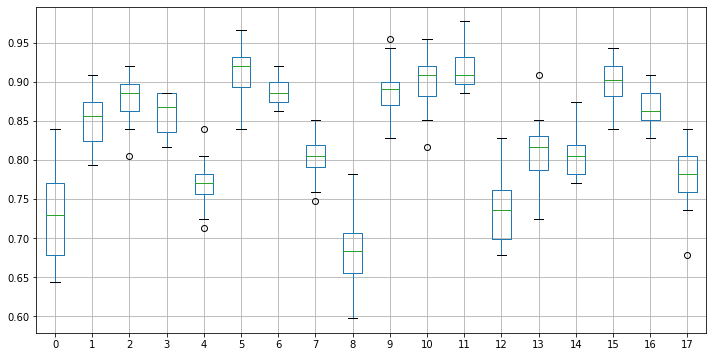

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '17'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.728161,0.055473,0.729885,17,0
1,0.849425,0.030729,0.856322,17,1
2,0.878736,0.028025,0.885057,17,2
3,0.859770,0.024624,0.867816,17,3
4,0.766667,0.029623,0.770115,17,4
5,0.910345,0.031112,0.919540,17,5
6,0.887356,0.018869,0.885057,17,6
7,0.800000,0.028499,0.804598,17,7
8,0.685057,0.049248,0.683908,17,8
9,0.887356,0.033893,0.890805,17,9
